# Prepare a model for glass classification using KNN

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [4]:
glass= pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.shape

(214, 10)

In [7]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
X=glass.iloc[:,:9]
Y=glass.iloc[:,-1]

In [13]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [14]:
sc=StandardScaler()

In [16]:
X=sc.fit_transform(X)

In [17]:
X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [18]:
num_folds = 10
kf = KFold(n_splits=10)

In [30]:
model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model, X, Y, cv=kf)

In [31]:
results

array([0.68181818, 0.77272727, 0.77272727, 0.77272727, 0.52380952,
       0.42857143, 0.47619048, 0.        , 0.23809524, 0.95238095])

In [32]:
print(results.mean())

0.5619047619047619


In [36]:
from sklearn.model_selection import GridSearchCV

In [39]:
p_g={'n_neighbors':[3,5,7,9,11,13,15,17,19,21]}

In [40]:
grid=GridSearchCV(estimator=model,param_grid=p_g,cv=5)
grid.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]})

In [41]:
print(grid.best_score_)
print(grid.best_params_)

0.6498338870431895
{'n_neighbors': 3}


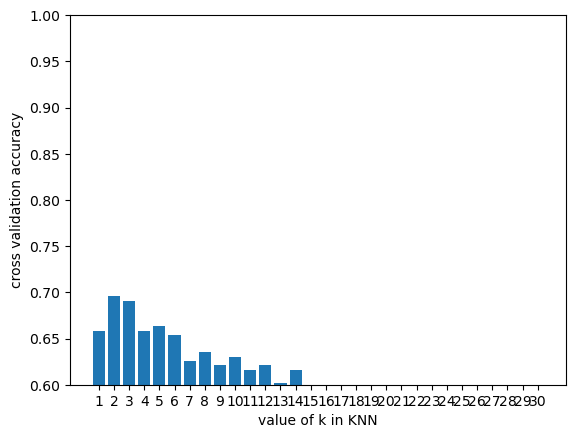

In [42]:
import matplotlib.pyplot as plt
# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

plt.bar(k_range,k_scores)
plt.xlabel('value of k in KNN')
plt.ylabel('cross validation accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()
# k_scores=grid.best_score_
#pd.Series(k_scores).sort_values(ascending=False)